In [ ]:
import nltk
import re
import string
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('lancaster_stemmer')
nltk.download('porter_stemmer')
nltk.download('snowball_stemmer')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading lancaster_stemmer: Package
[nltk_data]     'lancaster_stemmer' not found in index
[nltk_data] Error loading porter_stemmer: Package 'porter_stemmer' not
[nltk_data]     found in index
[nltk_data] Error loading snowball_stemmer: Package 'snowball_stemmer'
[nltk_data]     not found in index


**1. Write a program to get Antonyms from WordNet.**

In [ ]:
def get_antonyms(word):
    # Get the synsets for the given word
    synsets = wn.synsets(word)

    # Initialize an empty list to store the antonyms
    antonyms = []

    # Iterate over each synset and get its lemmas
    for synset in synsets:
        for lemma in synset.lemmas():
            # Check if the lemma has any antonyms
            if len(lemma.antonyms()) > 0:
                # Add the antonym to the list
                antonyms.append(lemma.antonyms()[0].name())

    return antonyms

In [ ]:
# Take input from the user
word = input("Enter a word: ")

Enter a word: football


In [ ]:
# Print out the antonyms of the entered word
if len(get_antonyms(word)) == 0:
    print(f"No antonyms found for '{word}'")
else:
    print(f"Antonyms for '{word}': {get_antonyms(word)}")

No antonyms found for 'football'


**2.Write a program for stemming non-English words.**

In [ ]:
# Define a dictionary mapping language codes to SnowballStemmer classes
STEMMERS = {
    'de': SnowballStemmer('german'),
    'es': SnowballStemmer('spanish'),
    'fr': SnowballStemmer('french'),
    'it': SnowballStemmer('italian'),
    'en': SnowballStemmer('english')
}

In [ ]:
# Prompt the user to enter a word and its language code
word = input("Enter a word: ")
language_code = input('''Enter its language code  \n (en for english, de for German, es for Spanish,fr for french, it for italian ): ''')

Enter a word: playing
Enter its language code  
 (en for english, de for German, es for Spanish,fr for french, it for italian ): en


In [ ]:
# Make sure the language code is valid
if language_code not in STEMMERS:
    raise ValueError(f"Invalid language code '{language_code}', supported languages are {' '.join(sorted(STEMMERS.keys()))}.")

# Tokenize the word into individual characters
tokens = word_tokenize(word)

# Create a stemmer object for the specified language
stemmer = STEMMERS[language_code]


In [ ]:
# Apply the stemmer to the tokens and join them back together
stemmed_word = ''.join([stemmer.stem(t) for t in tokens])

# Print out the stemmed word
print(f"The stemmed word for '{word}' is '{stemmed_word}'")

The stemmed word for 'playing' is 'play'


**3. Write a program for lemmatizing words Using WordNet (Use all type of stemmers for the comparison)**

In [ ]:
# Define a function to lemmatize a word using WordNetLemmatizer
def lemmatize_with_pos(word, pos=None):
    """Lemmatize a word using WordNetLemmatizer."""
    if pos is None:
        pos = 'v'  # Default verb POS tag
    lemmatizer = WordNetLemmatizer()
    try:
        return lemmatizer.lemmatize(word, pos=pos)
    except Exception as e:
        print(f"Error lemmatizing '{word}' with POS tag '{pos}': {str(e)}")
        return word


In [ ]:
# Prompt the user to enter a word
word = input("Enter a word to lemmitize: ")

Enter a word to lemmitize: walking


In [ ]:
print("\nWordNet Lemmatizer (default verb POS tag):", lemmatize_with_pos(word))
stop_words = set(stopwords.words('english'))
if word not in stop_words:
    print("WordNet Lemmatizer (noun POS tag):", lemmatize_with_pos(word, pos='n'))
    print("WordNet Lemmatizer (adj POS tag):", lemmatize_with_pos(word, pos='a'))
    print("WordNet Lemmatizer (adv POS tag):", lemmatize_with_pos(word, pos='r'))

# Perform stemming with PorterStemmer
print("\nPorterStemmer:", PorterStemmer().stem(word))

# Perform stemming with LancasterStemmer
print("\nLancasterStemmer:", LancasterStemmer().stem(word))


WordNet Lemmatizer (default verb POS tag): walk
WordNet Lemmatizer (noun POS tag): walking
WordNet Lemmatizer (adj POS tag): walking
WordNet Lemmatizer (adv POS tag): walking

PorterStemmer: walk

LancasterStemmer: walk


**4. Write a program to differentiate stemming and lemmatizing words**

In [ ]:
# Define a function to lemmatize a list of words using WordNetLemmatizer
def lemmatize_list(words):
    """Lemmatize a list of words using WordNetLemmatizer."""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

# Define a function to stem a list of words using PorterStemmer
def porter_stem_list(words):
    """Stem a list of words using PorterStemmer."""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

# Define a function to stem a list of words using LancasterStemmer
def lancaster_stem_list(words):
    """Stem a list of words using LancasterStemmer."""
    stemmer = LancasterStemmer()
    return [stemmer.stem(word) for word in words]


In [ ]:

# Prompt the user to enter a list of words separated by spaces
words = input("Enter a list of words separated by spaces: ").split()

# Remove punctuation marks and convert to lowercase
words = [word.strip(string.punctuation).lower() for word in words]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Display the original list of words
print("\nOriginal Words:")
print(" ", words)

# Perform lemmatization with WordNetLemmatizer
print("\nWordNet Lemmatizer:")
lemmatized_words = lemmatize_list(words)
print(" ", lemmatized_words)

# Perform stemming with PorterStemmer
print("\nPorterStemmer:")
stemmed_words = porter_stem_list(words)
print(" ", stemmed_words)

# Perform stemming with LancasterStemmer
print("\nLancasterStemmer:")
lanstemmed_words = lancaster_stem_list(words)
print(" ", lanstemmed_words)

# Count the frequency distribution of each unique word in each list
freq_dist_original = Counter(words)
freq_dist_lemmatized = Counter(lemmatized_words)
freq_dist_porters = Counter(stemmed_words)
freq_dist_lancers = Counter(lanstemmed_words)

# Display the frequency distributions
print("\nFrequency Distribution of Original Words:")
print(freq_dist_original)

print("\nFrequency Distribution of WordNet Lemmatizer:")
print(freq_dist_lemmatized)

print("\nFrequency Distribution of PorterStemmer:")
print(freq_dist_porters)

print("\nFrequency Distribution of LancasterStemmer:")
print(freq_dist_lancers)

Enter a list of words separated by spaces: reeve is playing football using a cricket ball

Original Words:
  ['reeve', 'playing', 'football', 'using', 'cricket', 'ball']

WordNet Lemmatizer:
  ['reeve', 'playing', 'football', 'using', 'cricket', 'ball']

PorterStemmer:
  ['reev', 'play', 'footbal', 'use', 'cricket', 'ball']

LancasterStemmer:
  ['reev', 'play', 'footbal', 'us', 'cricket', 'bal']

Frequency Distribution of Original Words:
Counter({'reeve': 1, 'playing': 1, 'football': 1, 'using': 1, 'cricket': 1, 'ball': 1})

Frequency Distribution of WordNet Lemmatizer:
Counter({'reeve': 1, 'playing': 1, 'football': 1, 'using': 1, 'cricket': 1, 'ball': 1})

Frequency Distribution of PorterStemmer:
Counter({'reev': 1, 'play': 1, 'footbal': 1, 'use': 1, 'cricket': 1, 'ball': 1})

Frequency Distribution of LancasterStemmer:
Counter({'reev': 1, 'play': 1, 'footbal': 1, 'us': 1, 'cricket': 1, 'bal': 1})


**5. Write a program for PoS Tagging and also execute any of the tool that given in class**

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
from nltk.tokenize import TreebankWordTokenizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
# Function to perform PoS tagging on a single sentence
def pos_tag_sentence(sentence):
    """Perform PoS tagging on a single sentence."""
    tagged_sentence = nltk.pos_tag(TreebankWordTokenizer().tokenize(sentence))
    return tagged_sentence

# Read a sentence from the user
sentence = input("Enter a sentence: ")

# Perform PoS tagging on the sentence
tagged_sentence = pos_tag_sentence(sentence)

Enter a sentence: Football is a popular sport played all over the world. It is a team sport where players aim to get a ball into the opposing team's goal by kicking it.


In [ ]:
# Display the tagged sentence
print("\nTagged Sentence:")
for i, (word, tag) in enumerate(tagged_sentence):
    print(f"{i+1}. {word:<12}{tag}")


Tagged Sentence:
1. Football    NN
2. is          VBZ
3. a           DT
4. popular     JJ
5. sport       NN
6. played      VBD
7. all         DT
8. over        IN
9. the         DT
10. world.      NN
11. It          PRP
12. is          VBZ
13. a           DT
14. team        NN
15. sport       NN
16. where       WRB
17. players     NNS
18. aim         VBP
19. to          TO
20. get         VB
21. a           DT
22. ball        NN
23. into        IN
24. the         DT
25. opposing    VBG
26. team        NN
27. 's          POS
28. goal        NN
29. by          IN
30. kicking     VBG
31. it          PRP
32. .           .


**6. Write a program to identify the Named Entity Recognition and also execute any of the tool that given in class**

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
# Function to perform named entity recognition on a single sentence
def ner_tag_sentence(sentence):
    """Perform named entity recognition on a single sentence."""
    ne_tags = nltk.ne_chunk(nltk.pos_tag(word_tokenize(sentence)))
    return ne_tags

In [ ]:
# Read a paragraph from the user
paragraph = input("Enter a paragraph: ")

# Tokenize the paragraph into sentences
sentences = sent_tokenize(paragraph)

Enter a paragraph: Football is a popular sport played all over the world. It is a team sport where players aim to get a ball into the opposing team's goal by kicking it.


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('names')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [ ]:
# Extract named entities from each sentence
named_entities = []
for sentence in sentences:
    ne_tags = ner_tag_sentence(sentence)
    for ne_tag in ne_tags:
        if hasattr(ne_tag, 'label'):
            named_entity = (' '.join([word for word, pos in ne_tag]), ne_tag.label())
            named_entities.append(named_entity)

In [ ]:
# Display the extracted named entities
print("\nExtracted Named Entities:")
for i, (entity, label) in enumerate(named_entities):
    print(f"{i+1}. {entity} ({label})")


Extracted Named Entities:
1. Football (GPE)


**7. Implement the Dependency Parsing and Constituency Parsing using the tool**

Constituency Parse

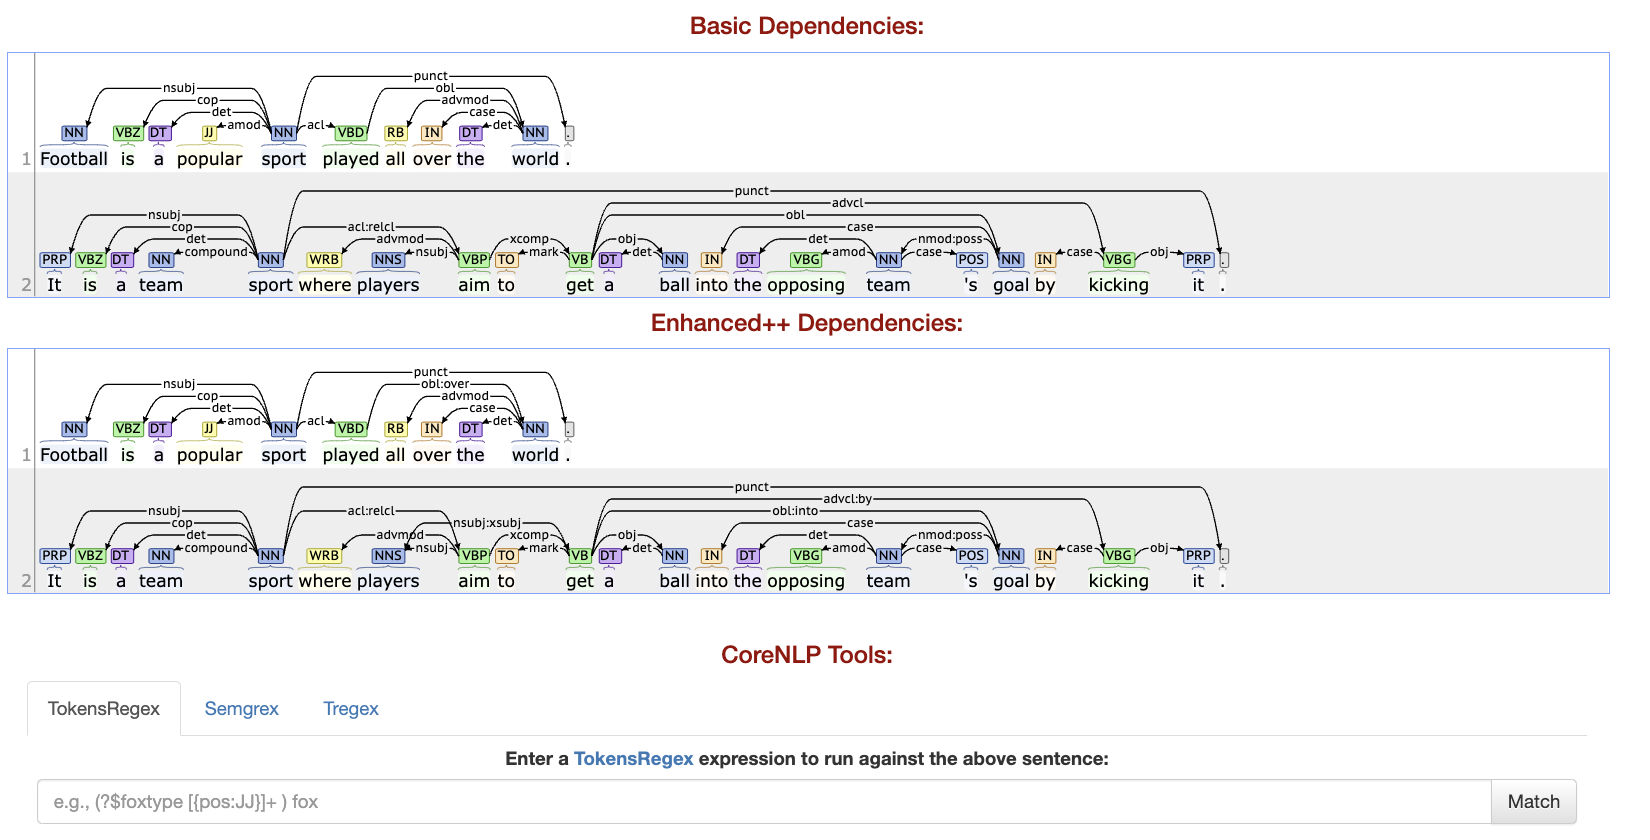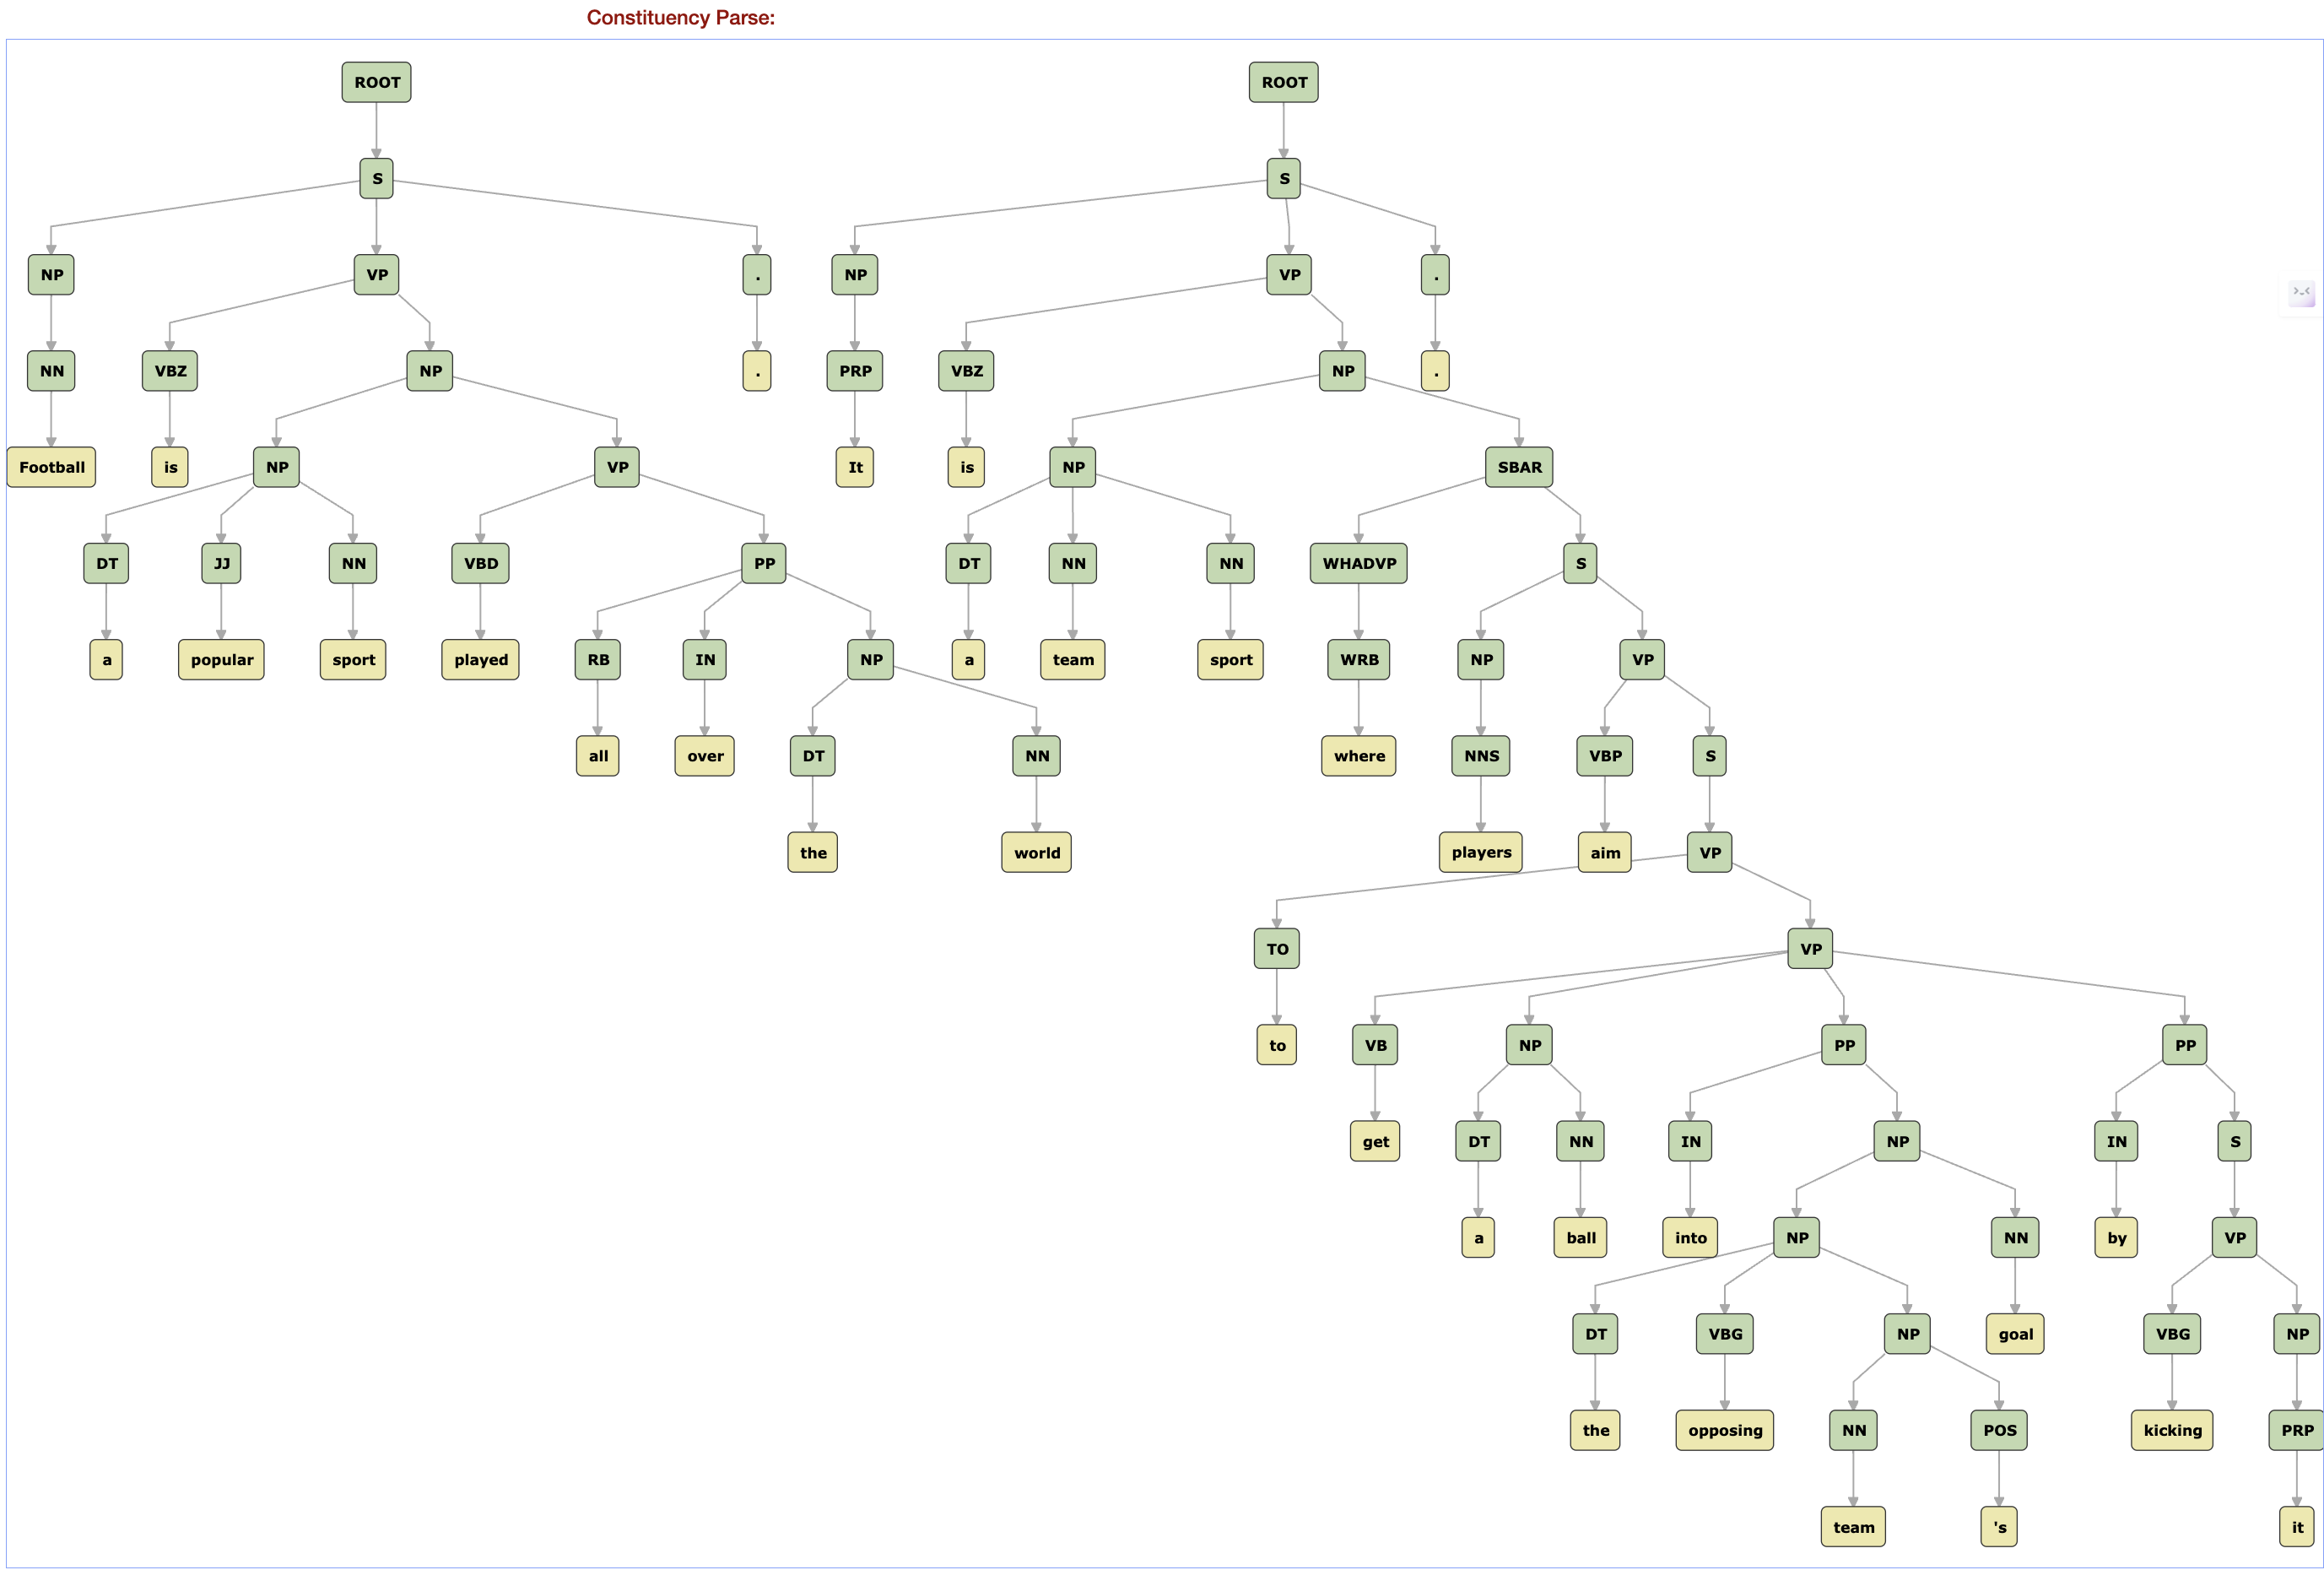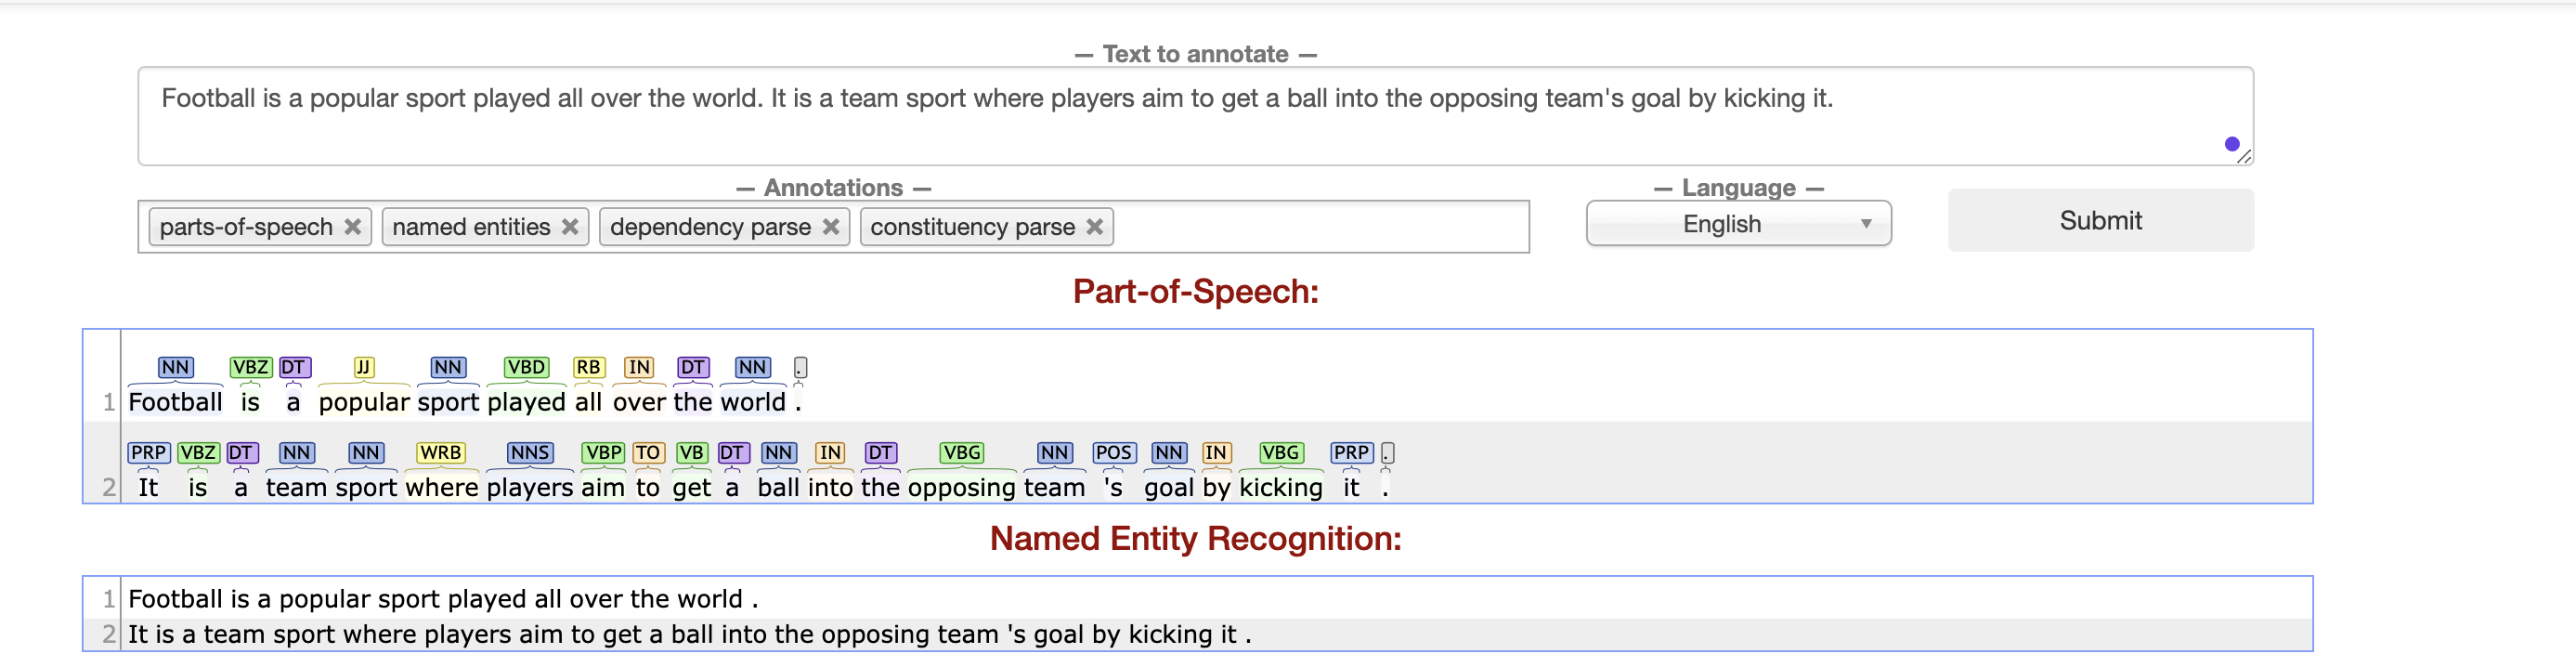

Dependency Parsing